# Trabalho 1° de Mineração de Dados

## Movies on Netflix, Prime Video, Hulu and Disney+
### A collection of movies found on these streaming platforms


### Alunos

**Nome: Natanael Moreira de lemos - Matricula: 398447**  
**Nome: Ramiro Campos de Castro - Matricula: 400723**

## Perguntas Sobre o dataset

* Média de idade por cada plataforma ou por filme
* Média Imdb por país ou plataforma
* Média do Rotten Tomatoes
* Classificação de idade dos filmes em cada plataforma
* Diretor com mais filmes em cada plataforma
* Linguagem dos filmes
* Filmes com maior duração ou menor duração
* Qual plataforma tem mais séries ou filmes
* Gênero de filme mais popular
* Qual pais tem mais locação de filmes
* Qual plataforma possui mais disponibilidade de filmes 
* Ou Qual plataforma tem mais filmes 





In [230]:
import numpy as np
import pandas as pd

In [231]:
import matplotlib.pyplot as plt
%matplotlib inline

In [232]:
data = pd.read_csv("MoviesOnStreamingPlatforms_updated.csv")

In [233]:
data.head(10)

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
5,5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,97%,1,0,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0
6,6,7,The Pianist,2002,18+,8.5,95%,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0
7,7,8,Django Unchained,2012,18+,8.4,87%,1,0,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0
8,8,9,Raiders of the Lost Ark,1981,7+,8.4,95%,1,0,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0
9,9,10,Inglourious Basterds,2009,18+,8.3,89%,1,0,0,0,0,Quentin Tarantino,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.0


In [234]:
## Limpeza na coluna de idade

for i in range(len(data['Age'])):
    aux = data.loc[i,'Age']
    if aux != np.nan or aux != 'all' or aux != '':
        aux = str(aux)
        if '+' in aux:
            data.loc[i,'Age'] = aux.strip().split('+')[0]
            

In [235]:
data.describe()

,Unnamed: 0,ID,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
count,16744.000000,16744.000000,16744.000000,16173.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.0,16152.000000
mean,8371.500000,8372.500000,2003.014035,5.902751,0.212613,0.053930,0.737817,0.033684,0.0,93.413447
std,4833.720789,4833.720789,20.674321,1.347867,0.409169,0.225886,0.439835,0.180419,0.0,28.219222
min,0.000000,1.000000,1902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,4185.750000,4186.750000,2000.000000,5.100000,0.000000,0.000000,0.000000,0.000000,0.0,82.000000
50%,8371.500000,8372.500000,2012.000000,6.100000,0.000000,0.000000,1.000000,0.000000,0.0,92.000000
75%,12557.250000,12558.250000,2016.000000,6.900000,0.000000,0.000000,1.000000,0.000000,0.0,104.000000
max,16743.000000,16744.000000,2020.000000,9.300000,1.000000,1.000000,1.000000,1.000000,0.0,1256.000000


In [236]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16744 non-null  int64  
 1   ID               16744 non-null  int64  
 2   Title            16744 non-null  object 
 3   Year             16744 non-null  int64  
 4   Age              7354 non-null   object 
 5   IMDb             16173 non-null  float64
 6   Rotten Tomatoes  5158 non-null   object 
 7   Netflix          16744 non-null  int64  
 8   Hulu             16744 non-null  int64  
 9   Prime Video      16744 non-null  int64  
 10  Disney+          16744 non-null  int64  
 11  Type             16744 non-null  int64  
 12  Directors        16018 non-null  object 
 13  Genres           16469 non-null  object 
 14  Country          16309 non-null  object 
 15  Language         16145 non-null  object 
 16  Runtime          16152 non-null  float64
dtypes: float64(2

### Porcentagem de Filmes em cada plataforma

In [237]:
labels = 'Netflix','PrimeVideo', 'Hulu','Disney+'
values = {'Netflix':0,'Prime Video':0,'Hulu':0,'Disney+':0}

values['Netflix'] = len(data[data['Netflix'] == 1])
values['Prime Video'] = len(data[data['Prime Video'] == 1])
values['Hulu'] = len(data[data['Hulu'] == 1])
values['Disney+'] = len(data[data['Disney+'] == 1])

sizes = list(values.values())

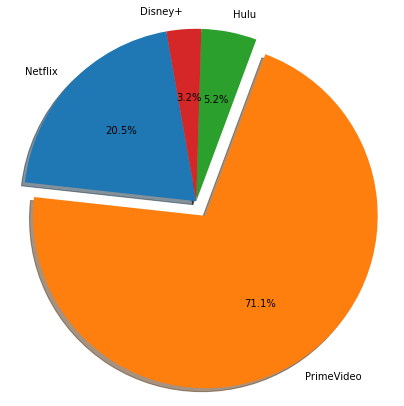

In [238]:
fig, axes = plt.subplots(figsize=(7,7))
explode = (0, 0.1, 0, 0)

axes.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=100)
axes.axis('equal')
plt.show()